<a href="https://www.kaggle.com/code/shiyamaladevirs/installingqiskit-basicquantumprogramming?scriptVersionId=276182746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Install Qiskit**

In [2]:
# Install Qiskit and Qiskit Runtime
!pip install qiskit qiskit-ibm-runtime

# Install visualization support
!pip install 'qiskit[visualization]'

# Install additional plotting libraries (already in Colab but just in case)
!pip install matplotlib pylatexenc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 43.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2bb9ba2b12f688c5e4464f02a88a78eef33e7724e054c8fa950ad4a7bcde2037
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


**Verify Installation**

In [3]:
from qiskit import __version__
print(f"Qiskit version: {__version__}")


Qiskit version: 2.2.3


**Working with Vectors and Matrices**

**Import NumPy**

In [4]:
import numpy as np

# Create quantum state vectors
ket0 = np.array([[1], [0]])  # |0⟩
ket1 = np.array([[0], [1]])  # |1⟩

print("ket0 (|0⟩):")
print(ket0)
print("\nket1 (|1⟩):")
print(ket1)


ket0 (|0⟩):
[[1]
 [0]]

ket1 (|1⟩):
[[0]
 [1]]


**Create a Superposition**

In [5]:
# Create |+⟩ = (|0⟩ + |1⟩)/√2
plus_state = ket0 / 2 + ket1 / 2
print("Average of |0⟩ and |1⟩:")
print(plus_state)


Average of |0⟩ and |1⟩:
[[0.5]
 [0.5]]


**Matrix Operations**

In [6]:
# Create matrices
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])  # Identity

# Matrix arithmetic
M = M1 / 2 + M2 / 2
print("Combined matrix M:")
print(M)

# Matrix multiplication
result = np.matmul(M1, ket1)
print("\nM1 × |1⟩:")
print(result)


Combined matrix M:
[[1.  0.5]
 [0.  0.5]]

M1 × |1⟩:
[[1]
 [0]]


**Pretty Printing with Qiskit**

In [7]:
from qiskit.visualization import array_to_latex

# Display matrix beautifully
display(array_to_latex(M))
display(array_to_latex(result))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**Working with Quantum States**

**Create Quantum States**

In [9]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

# Plus state: |+⟩ = (|0⟩ + |1⟩)/√2
u = Statevector([1/sqrt(2), 1/sqrt(2)])

# Complex state
v = Statevector([(1 + 2.0j)/3, -2/3])

# Invalid state (for testing)
w = Statevector([1/3, 2/3])


**Display States in Different Formats**

In [11]:
# Text format
print("Text format:")
print(u.draw("text"))

# LaTeX format (pretty!)
print("\nLaTeX format:")
display(u.draw("latex"))




Text format:
[0.70710678+0.j,0.70710678+0.j]

LaTeX format:


<IPython.core.display.Latex object>

**Validate Quantum States**

In [12]:
print(f"Is u valid? {u.is_valid()}")  # True
print(f"Is w valid? {w.is_valid()}")  # False (not normalized)


Is u valid? True
Is w valid? False


**Simulating Measurements**

**Single Measurement**

In [13]:
# Create a state
v = Statevector([(1 + 2.0j)/3, -2/3])

print("Original state:")
display(v.draw("latex"))

# Measure it
outcome, state = v.measure()
print(f"\nMeasured outcome: {outcome}")
print("State after measurement:")
display(state.draw("latex"))


Original state:


<IPython.core.display.Latex object>


Measured outcome: 0
State after measurement:


<IPython.core.display.Latex object>

**Multiple Measurements**

Measurement statistics:
{'0': 526, '1': 474}


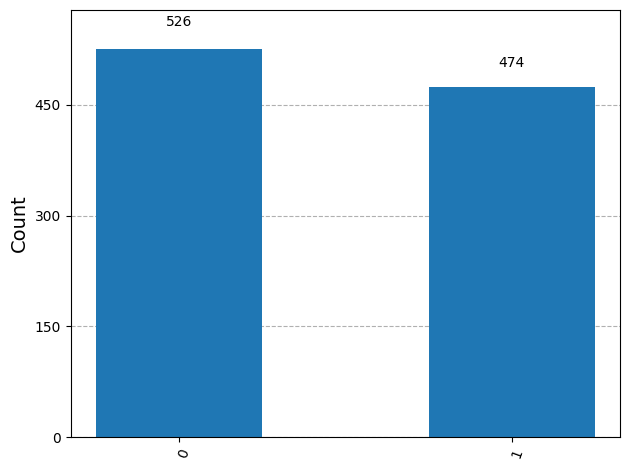

In [14]:
from qiskit.visualization import plot_histogram

# Create plus state
v = Statevector([1/sqrt(2), 1/sqrt(2)])

# Measure 1000 times
statistics = v.sample_counts(1000)

print("Measurement statistics:")
print(statistics)

# Visualize with histogram
plot_histogram(statistics)


**Quantum Operations (Gates)**


**Define Common Gates**

In [16]:
from qiskit.quantum_info import Operator

# Pauli gates
X = Operator([[0, 1], [1, 0]])      # NOT gate
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])

# Hadamard gate
H = Operator([[1/sqrt(2), 1/sqrt(2)], 
              [1/sqrt(2), -1/sqrt(2)]])

# Phase gates
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j)/sqrt(2)]])

# Display a gate
print("Hadamard gate:")
display(H.draw("latex"))


Hadamard gate:


<IPython.core.display.Latex object>

**Apply Gates to States**

In [17]:
# Start with |0⟩
v = Statevector([1, 0])

print("Initial state: |0⟩")
display(v.draw("latex"))

# Apply Hadamard
v = v.evolve(H)
print("\nAfter Hadamard:")
display(v.draw("latex"))

# Apply more gates
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

print("\nFinal state after H→T→H→S→Y:")
display(v.draw("latex"))


Initial state: |0⟩


<IPython.core.display.Latex object>


After Hadamard:


<IPython.core.display.Latex object>


Final state after H→T→H→S→Y:


<IPython.core.display.Latex object>

**Quantum Circuits**

**Create Your First Circuit**

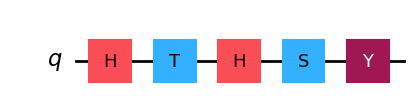

In [18]:
from qiskit import QuantumCircuit

# Create circuit with 1 qubit
circuit = QuantumCircuit(1)

# Add gates
circuit.h(0)  # Hadamard on qubit 0
circuit.t(0)  # T gate
circuit.h(0)  # Another Hadamard
circuit.s(0)  # S gate
circuit.y(0)  # Pauli-Y

# Draw the circuit
circuit.draw(output='mpl')


Get the Circuit's Unitary Matrix

In [19]:
# Extract the combined unitary operation
U = Operator.from_circuit(circuit)

print("Overall unitary matrix:")
display(U.draw("latex"))


Overall unitary matrix:


<IPython.core.display.Latex object>

Simulate the Circuit

In [20]:
# Initialize state |0⟩
ket0 = Statevector([1, 0])

# Evolve through circuit
final_state = ket0.evolve(circuit)

print("Final state after circuit:")
display(final_state.draw("latex"))


Final state after circuit:


<IPython.core.display.Latex object>

Measurement results:
{'0': 557, '1': 3443}


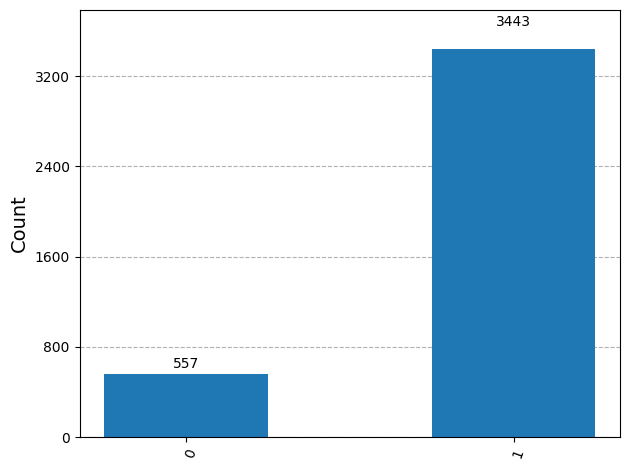

In [21]:
# Measure 4000 times
statistics = final_state.sample_counts(4000)

print("Measurement results:")
print(statistics)

# Visualize
plot_histogram(statistics)


**Fun Experiments to Try**

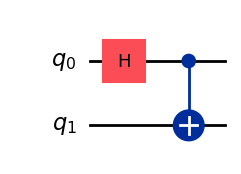

In [24]:
#Experiment 1: Create the Bell State
# Two-qubit entanglement!
circuit = QuantumCircuit(2)
circuit.h(0)           # Superposition on qubit 0
circuit.cx(0, 1)       # CNOT: entangle qubits

circuit.draw(output='mpl')


In [25]:
#Experiment 2: Test Different Gates
# Compare X, Y, Z on |+⟩
plus = Statevector([1/sqrt(2), 1/sqrt(2)])

print("Original |+⟩:")
display(plus.draw("latex"))

print("\nAfter X gate:")
display(plus.evolve(X).draw("latex"))

print("\nAfter Y gate:")
display(plus.evolve(Y).draw("latex"))

print("\nAfter Z gate:")
display(plus.evolve(Z).draw("latex"))


Original |+⟩:


<IPython.core.display.Latex object>


After X gate:


<IPython.core.display.Latex object>


After Y gate:


<IPython.core.display.Latex object>


After Z gate:


<IPython.core.display.Latex object>

In [26]:
#Experiment 3: Verify H² = I
# Hadamard is its own inverse!
v = Statevector([1, 0])
v = v.evolve(H).evolve(H)

print("After applying H twice:")
display(v.draw("latex"))
# Should be back to |0⟩!


After applying H twice:


<IPython.core.display.Latex object>